### Plots and Analyses for MRI Super-Resolution with Implicit Neural Representations

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns
import pandas as pd
import json
import os

%matplotlib inline

#### Effect of the Fourier Feature mapping dimension on the reconstruction accuracy

In this section, we will plot the structural similarity index (SSIM) and peak signal-to-noise ratio (PSNR) for different values of Fourier Feature mapping. 

In [13]:
ff_map_dims = [32, 64, 128, 256, 512]
ssim, psnr = {}, {}

# load the results from the json files
for ff_map_dim in ff_map_dims:
    with open(os.path.join(os.getcwd(), f"ablation_ff_mapping/FF_MAP={ff_map_dim}.json")) as f:
        results = json.load(f)
        ssim[ff_map_dim] = results['ssim']
        psnr[ff_map_dim] = results['psnr']

# store the results in a dataframe
df = pd.DataFrame({'FF_MAP': ff_map_dims, 'SSIM': list(ssim.values()), 'PSNR': list(psnr.values())})

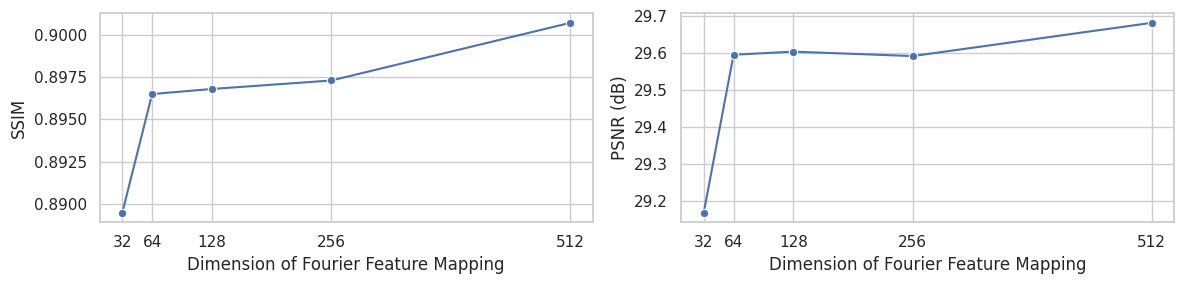

In [15]:
# create an sns plot with ff map dim as x-axis and ssim as y-axis
fig, ax = plt.subplots(1, 2, figsize=(12, 3), tight_layout=True)
sns.set_theme(style="whitegrid")
# plt.xkcd()

# plot ssim vs ff map dim on the first subplot
sns.lineplot(data=df, x='FF_MAP', y='SSIM', marker='o', ax=ax[0])
# ax[0].set_title('SSIM vs Fourier Feature Dimensions')
ax[0].set_xlabel('Dimension of Fourier Feature Mapping')
ax[0].set_ylabel('SSIM')
ax[0].set_xticks(ff_map_dims)

# plot psnr vs ff map dim on the second subplot
sns.lineplot(data=df, x='FF_MAP', y='PSNR', marker='o', ax=ax[1])
# ax[1].set_title('PSNR vs Fourier Feature Dimensions')
ax[1].set_xlabel('Dimension of Fourier Feature Mapping')
ax[1].set_ylabel('PSNR (dB)')
ax[1].set_xticks(ff_map_dims)

# plt.tight_layout()
plt.savefig('ff_map_dim_vs_ssim_psnr.png', dpi=200)


With these plots, we observe that the reconstruction accuracy increases as we increase the dimensions of the Fourier Feature mapping. In other words, the higher the dimension that the input coordinates are projected to, the higher is the reconstruction accuracy. 

Next, we will plot the effect of _scaling_ the Fourier features on the reconstruction accuracy.

#### Effect of scaling the Fourier Features on the reconstruction accuracy

In [10]:
ff_scales = [2, 4, 8]
scale_ssim, scale_psnr = {}, {}

for ff_scale in ff_scales:
    with open(os.path.join(os.getcwd(), f"ablation_ff_scale/FF_MAP=512_SCALE={ff_scale}.json")) as f:
        results = json.load(f)
        scale_ssim[ff_scale] = results['ssim']
        scale_psnr[ff_scale] = results['psnr']

# store the results in a dataframe
scale_df = pd.DataFrame({'FF_SCALE': ff_scales, 'SSIM': list(scale_ssim.values()), 'PSNR': list(scale_psnr.values())})

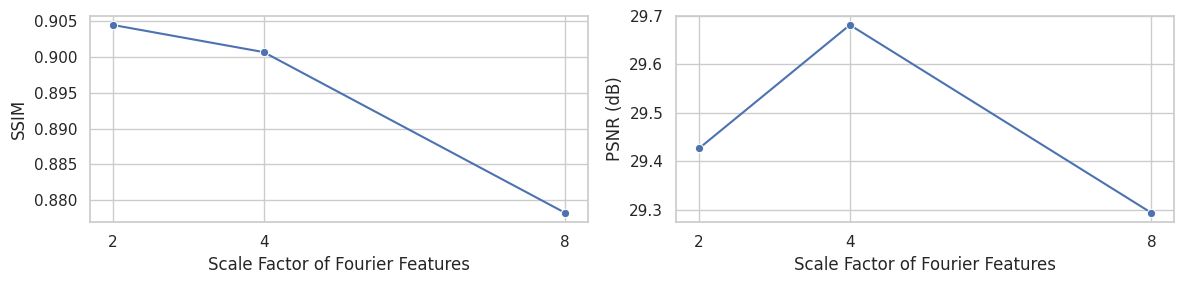

In [16]:
# create an sns plot with ff map dim as x-axis and ssim as y-axis
fig, ax = plt.subplots(1, 2, figsize=(12, 3), tight_layout=True)
sns.set_theme(style="whitegrid")
# plt.xkcd()

# plot ssim vs ff map dim on the first subplot
sns.lineplot(data=scale_df, x='FF_SCALE', y='SSIM', marker='o', ax=ax[0])
# ax[0].set_title('SSIM vs Fourier Feature Dimensions')
ax[0].set_xlabel('Scale Factor of Fourier Features')
ax[0].set_ylabel('SSIM')
ax[0].set_xticks(ff_scales)

# plot psnr vs ff map dim on the second subplot
sns.lineplot(data=scale_df, x='FF_SCALE', y='PSNR', marker='o', ax=ax[1])
# ax[1].set_title('PSNR vs Fourier Feature Dimensions')
ax[1].set_xlabel('Scale Factor of Fourier Features')
ax[1].set_ylabel('PSNR (dB)')
ax[1].set_xticks(ff_scales)

plt.savefig('ff_scale_vs_ssim_psnr.png', dpi=200)


Here, we observe that increasing the scale factor only decreases SSIM. With PSNR, the scale factor of 4 results in best reconstruction. Hence, we can conclude that setting the scale factor to 4.0 is a good trade-off between SSIM and PSNR. 